In [ ]:
!pip install pydataset
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install yfinance

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt
from pydataset import data
import statsmodels as sm
import statsmodels.api as sm_api
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://365datascience.com/question/typeerror-string-indices-must-be-integers/
#override the data reader function

yf.pdr_override()


# Bitcoin

In [ ]:
start=dt.datetime(2007, 1, 1)
end=dt.datetime(2023, 1, 31)

# cargar datos en 'bit'

bit=web.get_data_yahoo('BTC-USD', start=start, end=end)
bit


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-01-26,23108.955078,23237.078125,22911.373047,23032.777344,23032.777344,26357839322
2023-01-27,23030.716797,23417.720703,22654.593750,23078.728516,23078.728516,25383335641
2023-01-28,23079.964844,23165.896484,22908.845703,23031.089844,23031.089844,14712928379


In [ ]:
bit.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30'],
              dtype='datetime64[ns]', name='Date', length=3058, freq=None)

In [ ]:
# ver si hay valores ausentes
print(bit.loc[bit['Volume'].isnull()]==True)

# no hay faltantes

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


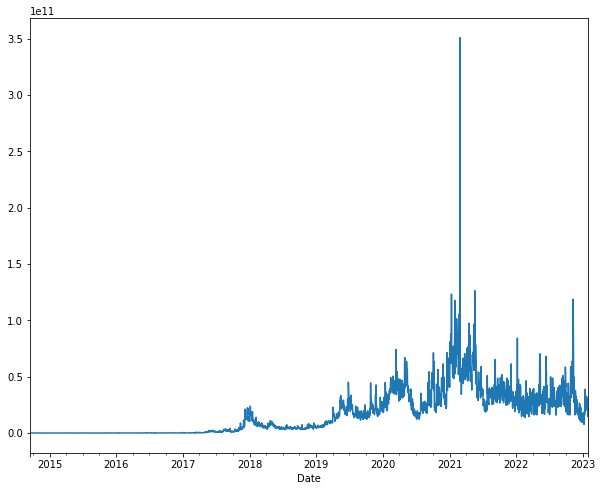

In [ ]:
# ver data
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.squeeze.html

serie=bit['Volume'].squeeze()

plot= serie.plot(figsize=(10, 8))
plt.show()

# Estacionareidad

In [ ]:
'''Test de Dickey-Fuller para determinar si la serie es estacionaria o no

La hipótesis nula de la prueba es que la serie temporal se puede representar 
mediante una raíz unitaria, es decir, que no es estacionaria (tiene alguna estructura 
dependiente del tiempo). 
La hipótesis alternativa (rechazando la hipótesis nula) es que la serie de 
tiempo es estacionaria.

Hipótesis nula (H0): si no se rechaza, sugiere que la serie de tiempo tiene una 
raíz unitaria, lo que significa que no es estacionaria. 
Tiene una estructura dependiente del tiempo.
Hipótesis Alterna (H1): Se rechaza la hipótesis nula; sugiere que la serie de 
tiempo no tiene una raíz unitaria, lo que significa que es estacionaria. 
No tiene una estructura dependiente del tiempo.
Interpretamos este resultado utilizando el valor p de la prueba. 
Un valor de p por debajo de un umbral (como 5 % o 1 %) sugiere que rechazamos 
la hipótesis nula (estacionaria); de lo contrario, un valor de p por encima del 
umbral sugiere que no rechazamos la hipótesis nula (no estacionaria).
Ej:
p-value > 0.05: No se puede rechazar la hipótesis nula (H0), los datos tienen 
raíz unitaria y no son estacionarios.
p-value <= 0.05: Rechazar la hipótesis nula (H0), los datos no tienen raíz 
unitaria y son estacionarios.
'''
# https://machinelearningmastery.com/time-series-data-stationary-python/

X = serie.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

result

ADF Statistic: -2.085932
p-value: 0.250209
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


(-2.085931616238378,
 0.25020906724923914,
 29,
 3028,
 {'1%': -3.4325114439420568,
  '5%': -2.862494987665022,
  '10%': -2.567278364489773},
 146777.8231799052)

# Cuanto más negativo sea este estadístico, más probable es que rechacemos la hipótesis nula (tenemos un conjunto de datos estacionario).
# Para este caso, el estadístico de la serie es mayor que los valores críticos, entonces debemos aceptar la H0 -> la serie es NO ESTACIONARIA

# Tendencia y Ciclo

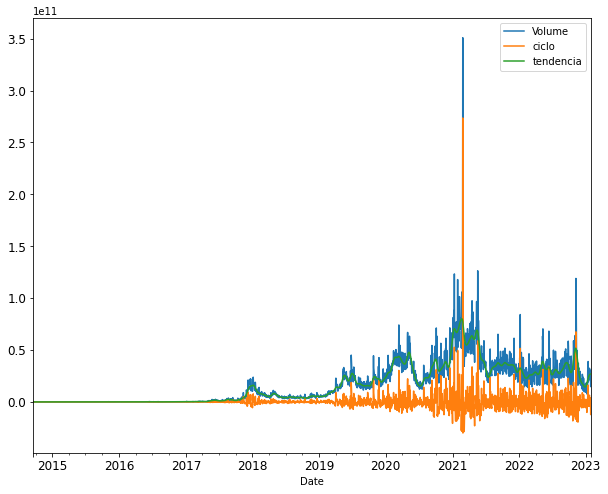

In [ ]:
# filtro de Hodrick-Prescott para separar tendencia y componente
# https://www.statsmodels.org/dev/tsa.html

ciclo,tendencia = sm_api.tsa.filters.hpfilter(serie)

bit['ciclo']=ciclo
bit['tendencia']=tendencia   # media móvil anual

bit[['Volume', 'ciclo', 'tendencia']].plot(figsize=(10,8), fontsize=12)
legend=plt.legend()
legend.prop.set_size(14)
plt.show()

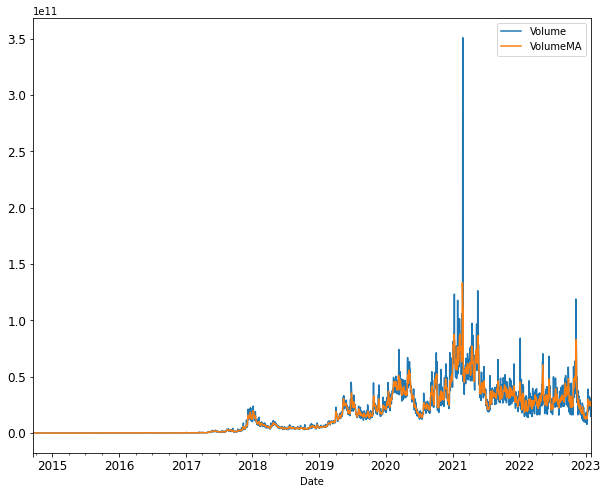

In [ ]:
VolumeMA=serie.rolling(window=5, center=True).mean()   # media móvil a 5 días (ventana 'deslizante')
bit['VolumeMA']=VolumeMA
plot=bit[['Volume', 'VolumeMA']].plot(figsize=(10,8), fontsize=12)
plt.show()

# Descomposición

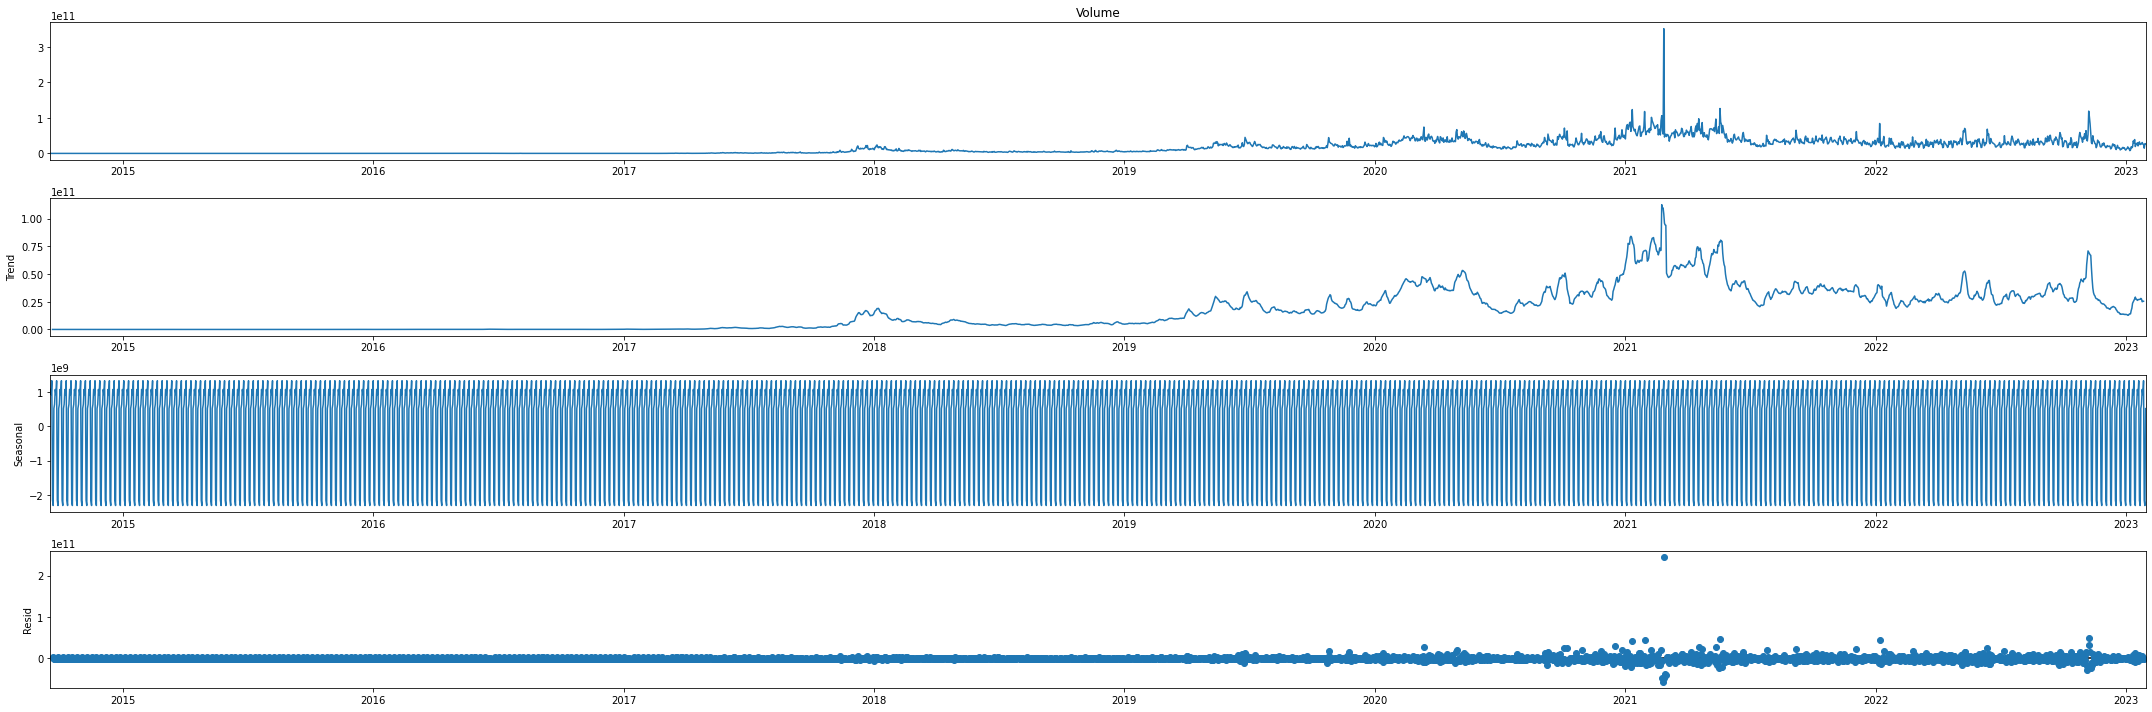

In [ ]:
descomposicion=sm_api.tsa.seasonal_decompose(serie, model='additive')

plt.rcParams['figure.figsize'] = [30, 10]
fig=descomposicion.plot()
plt.show()

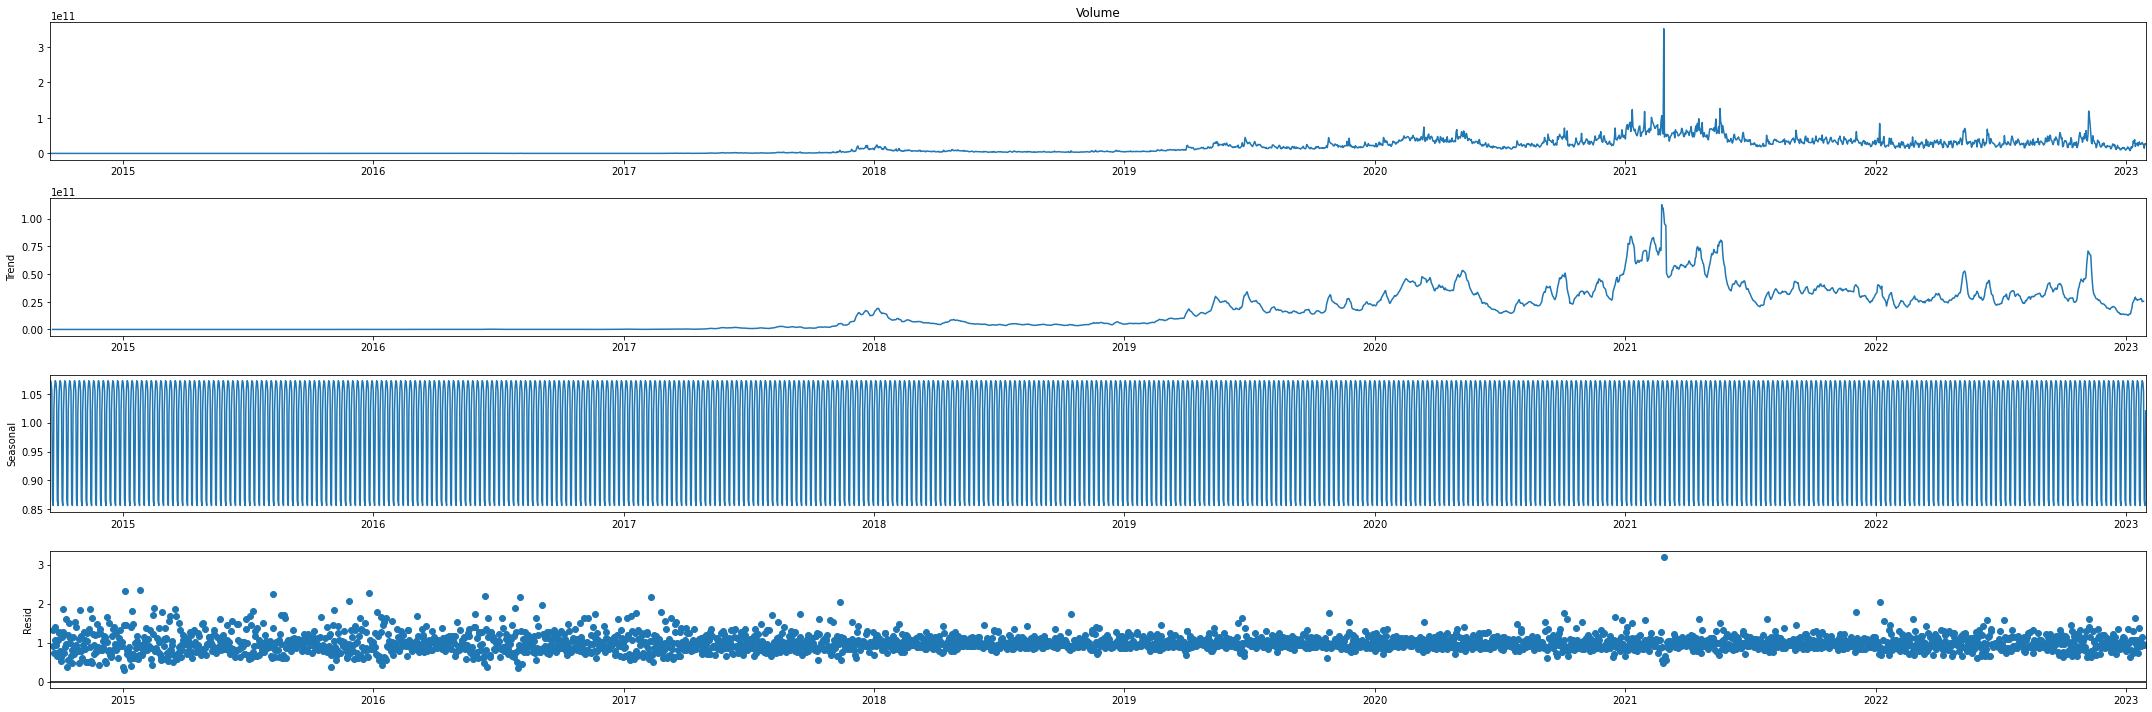

In [ ]:
descomposicion=sm_api.tsa.seasonal_decompose(serie, model='multiplicative')

plt.rcParams['figure.figsize'] = [30, 10]
fig=descomposicion.plot()
plt.show()

# Arima

In [ ]:
# pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

serie=serie.asfreq('D')    # cambiamos a frecuencia diaria
serie

Date
2014-09-17       21056800
2014-09-18       34483200
2014-09-19       37919700
2014-09-20       36863600
2014-09-21       26580100
                 ...     
2023-01-26    26357839322
2023-01-27    25383335641
2023-01-28    14712928379
2023-01-29    27423687259
2023-01-30    27205595568
Freq: D, Name: Volume, Length: 3058, dtype: int64

In [ ]:
# separo hasta el 31-12-2022 y el mes de enero de 2023
serie1=serie[:'2022']
serie2=serie['2023':]
serie2

Date
2023-01-01     9244361700
2023-01-02    12097775227
2023-01-03    13903079207
2023-01-04    18421743322
2023-01-05    13692758566
2023-01-06    14413662913
2023-01-07     7714767174
2023-01-08     9768827914
2023-01-09    18624736866
2023-01-10    15808338949
2023-01-11    18372283782
2023-01-12    34971338710
2023-01-13    29225029694
2023-01-14    38967784639
2023-01-15    19298407543
2023-01-16    26792494050
2023-01-17    24999983362
2023-01-18    30005625418
2023-01-19    21152848261
2023-01-20    28799154319
2023-01-21    32442278429
2023-01-22    24746386230
2023-01-23    26518700512
2023-01-24    26405069715
2023-01-25    30685366709
2023-01-26    26357839322
2023-01-27    25383335641
2023-01-28    14712928379
2023-01-29    27423687259
2023-01-30    27205595568
Freq: D, Name: Volume, dtype: int64

In [ ]:
# invocar modelo ARIMA, entrenar y mostrar resultados para 'serie1'
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA

modelo=sm.tsa.arima.model.ARIMA(serie1.iloc[1:], order=(1,0,0))
resultados=modelo.fit()
print(resultados.summary())


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 3027
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -73906.733
Date:                Fri, 24 Feb 2023   AIC                         147819.466
Time:                        01:38:51   BIC                         147837.512
Sample:                    09-18-2014   HQIC                        147825.954
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.635e+10   5.01e-16   3.26e+25      0.000    1.63e+10    1.63e+10
ar.L1          0.8736      0.001    831.413      0.000       0.872       0.876
sigma2      9.434e+19   3.44e-24   2.74e+43      0.0

In [ ]:
pronostico=resultados.fittedvalues
df=bit['Volume'].squeeze()
df['pronostico']=pronostico
df

Date
2014-09-17 00:00:00                                                                                     21056800
2014-09-18 00:00:00                                                                                     34483200
2014-09-19 00:00:00                                                                                     37919700
2014-09-20 00:00:00                                                                                     36863600
2014-09-21 00:00:00                                                                                     26580100
                                                                 ...                                            
2023-01-27 00:00:00                                                                                  25383335641
2023-01-28 00:00:00                                                                                  14712928379
2023-01-29 00:00:00                                                                        

In [ ]:
type(resultados)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

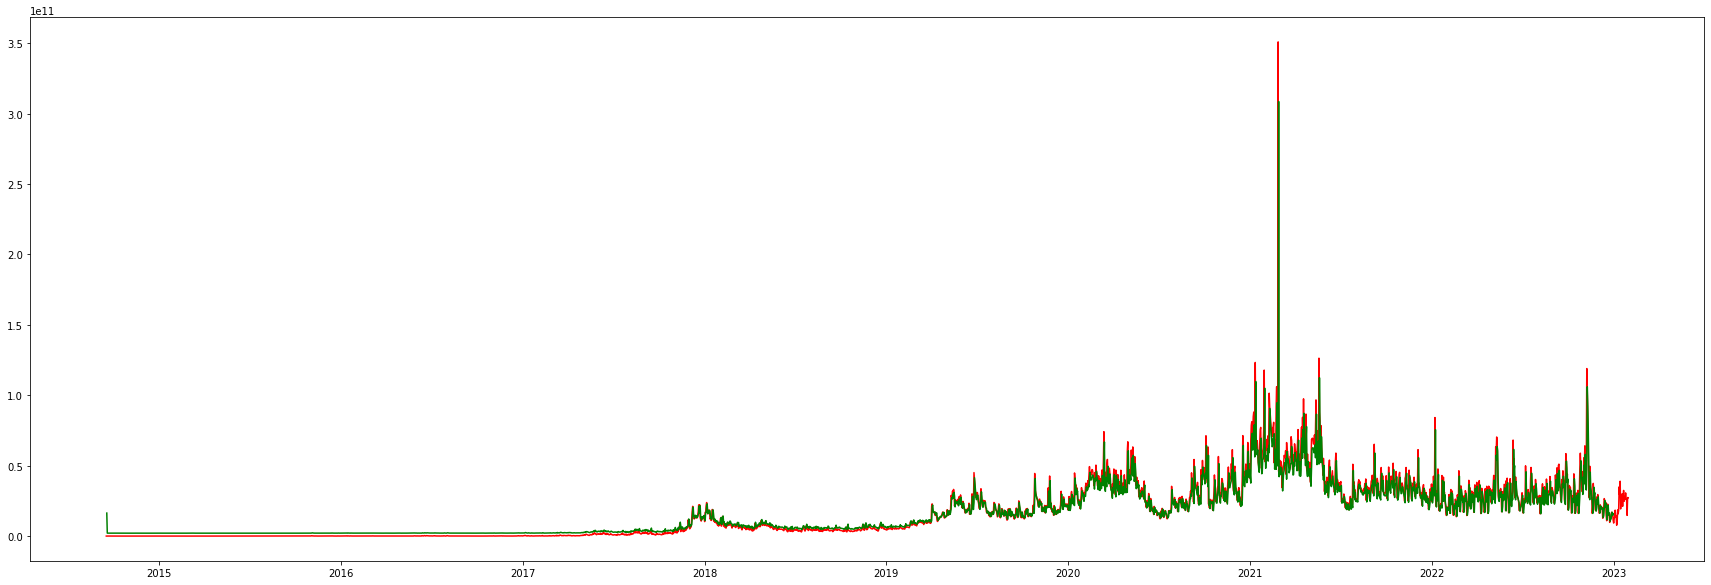

In [ ]:
df=bit['Volume'].squeeze()
df['pronostico']=pronostico

plt.plot(bit['Volume'], c='r')
plt.plot(resultados.fittedvalues, c='g')
plt.show()

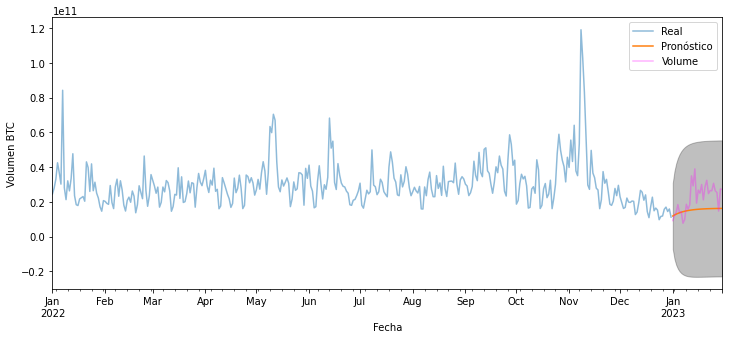

In [ ]:
# ahora hagamos un pronóstico (forecast)
pred_f = resultados.get_forecast(steps=30)
pred_ci = pred_f.conf_int()
ax = serie1['2022'].plot(label='Real', figsize=(12, 5), alpha=0.5)
pred_f.predicted_mean.plot(ax=ax, label='Pronóstico')
serie2.plot(color='magenta', alpha=0.3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Volumen BTC')
plt.legend()
plt.show()